In [1]:
from skimage import feature
import numpy as np

In [2]:
import os
path_yes = os.path.join(os.getcwd(),'brain_tumor_dataset','yes')
path_no = os.path.join(os.getcwd(),'brain_tumor_dataset','no')

classes={'no_tumor':0,'has_tumor':1}
print(path_no)
print(path_yes)

D:\brain tumor\brain_tumor_dataset\no
D:\brain tumor\brain_tumor_dataset\yes


In [3]:
import cv2
X=[]
Y=[]
for i in os.listdir(path_no):
    img=cv2.imread(path_no+'/'+i)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(200,200))
    X.append(img)
    Y.append(0)
for i in os.listdir(path_yes):
    img=cv2.imread(path_yes+'/'+i)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(200,200))
    X.append(img)
    Y.append(1)

In [4]:
from sklearn.model_selection import train_test_split

X=np.array(X)
Y=np.array(Y)

x_training, x_testing, y_training, y_testing = train_test_split(X, Y, random_state=10, test_size=.2)

x_training.shape, x_testing.shape

((202, 200, 200), (51, 200, 200))

In [5]:
def get_pixel(img, center, x, y):

    new_value = 0

    try:
        if img[x][y] in range(center-10,center+10):
            new_value=1
    except:
        pass
    return new_value

In [6]:
def lbp_calculated_pixel(img, x, y):

    center = img[x][y]

    val_ar = []

    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))

    # top
    val_ar.append(get_pixel(img, center, x-1, y))

    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))

    # right
    val_ar.append(get_pixel(img, center, x, y + 1))

    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))

    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))

    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))

    # left
    val_ar.append(get_pixel(img, center, x, y-1))

    # Now, we need to convert binary
    # values to decimal
    power_val = [128, 64, 32, 16, 8, 4, 2, 1]

    val = 0

    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]

    return val


In [7]:
def getLBPGrid(img_gray ,width, height):
    img_lbp = np.zeros((height, width),np.uint8)
    for i in range(1,height-1):
        for j in range(1,width-1):
            img_lbp[i,j]=lbp_calculated_pixel(img_gray,i,j)
    return img_lbp

In [8]:
def make_histogram(img_gray ,width, height):
    img_lbp = getLBPGrid(img_gray,width, height)
    hist=np.zeros(256,np.uint8)
    for i in range(1,height):
        for j in range(1,width):
            hist[img_lbp[i,j]]+=1
    return hist

In [9]:
hist_mine=make_histogram(x_training[0],width=200,height=200)
print(hist_mine)

[243 140 144  35 154  29  35  26 142  39  28  10  40  27  17  49 169 121
  41  58  30  22  32  56  27  68  11  10  37  54  57 246 135  37 114  27
  41   2  23  13  22   3   7   3   8   4  10   8  44  69  22  47  29   7
  42  43  27  16  11   5  51  16  81 163 148  32  42  36 155  18  52  41
  38   7   6   3  41   3  17  13  17  15   3   4  12   3   5   7  18   6
   1   2  46  12  17  56  30  29  13  49  37   2  35  44   9   4   4   1
  13   3   3  13  33  51  11  39  47  18  35 113  65  23   7  19  87  67
 162 249 141  36  26  20  39  33  14  51 176  32  20  11  35  44  13 104
  52  50   6  16   6   6   4  11  23  32   2  11  15  53   5 153  22   8
  12  10   3   4   2  11  18   1   0   3   4   0   1   5  16  17   3   6
   3   4   2  25   9   6   3   6   6  15   8  71  28  36   8  52  52  54
  15  67  30  15   1  15  48  45  17 211  23  48   3  20   5   9   5  56
  47  50   4  11  49 111  15  68  26  51  18  80  12  12  12 164  12   8
   2  11   3  18   2  82  52 229   8 146  27  59  1

# Data Visualization

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

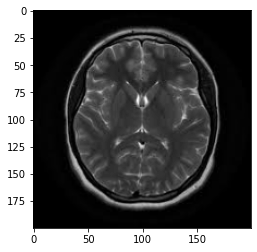

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_training[0],cmap='gray')
x_training[0]

In [11]:
test = x_training[0]
lbp=feature.local_binary_pattern(test,255,1,method='uniform')
lbp[50]

array([255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 127., 255., 255., 127., 255., 255., 127., 127.,
        64.,  64., 255., 255., 128., 255., 255., 192., 128., 128., 128.,
       128.,  64.,  64., 213.,   1.,  35., 113., 116., 165., 130., 111.,
         0., 130., 122., 128., 256., 187., 256.,  37., 256., 223., 127.,
         0.,  30., 256.,  37., 128.,  90.,  37., 256.,  57., 162., 125.,
        96.,  94., 108.,  99.,  70., 142., 182.,  64.,  70., 197., 221.,
       255., 255.,  57.,   0., 162., 255., 147., 118., 112., 119., 139.,
       166., 168., 181.,  72., 187., 164.,  10.,   0., 256., 141., 174.,
        94.,  86., 161., 140., 174.,   0., 256.,  64.,  90., 152., 182.,
       123.,  86.,  82.,  88., 108.,  70., 178., 255., 178., 166.,  68.,
       256.,  34., 146.,  64., 136., 108., 105., 256.,  82., 118., 115.,
       111., 103., 140.,  90.,  48.,  22.,   0.,  10.,  43., 133., 130.,
       255., 256., 195.,  10., 126., 151., 255., 12

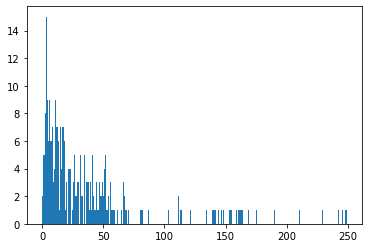

In [12]:
plt.hist(hist_mine,bins=256)
plt.show()

In [ ]:
hist_set=[]
label_set=[]
for i in range(len(x_training)):
    hist_mine=make_histogram(x_training[i],200,200)
    hist_set.append(hist_mine)
    label_set.append(y_training[i])

In [ ]:
from sklearn.linear_model import LogisticRegression

# Training model

In [ ]:
model=LogisticRegression(C=0.1,max_iter=1000)
model.fit(hist_set,label_set)

In [ ]:
np.where(y_training==1)

In [ ]:
positiveIndex=np.where(y_training==1)[0][0]

In [ ]:
positiveIndex

In [ ]:
lbpgrid=getLBPGrid(img_gray=x_training[positiveIndex],width=200,height=200)

In [ ]:
lbpgrid

plt.imshow(x_training[positiveIndex],cmap='gray')

In [ ]:
given_lbp=feature.local_binary_pattern(x_training[positiveIndex],256,1,method='uniform')
plt.imshow(given_lbp,cmap='gray')

In [ ]:
plt.imshow(lbpgrid,cmap='gray')

In [ ]:
part=4
seg_width=int(200/part)
seg_height=int(200/part)
x_training_self=[]
for height in range(part):
    h_start=height*seg_height
    for width in range(part):
        w_start=width*seg_width
        lbp_seg=lbpgrid[h_start:(h_start+seg_height),w_start:(w_start+seg_width)]
        hist_seg=make_histogram(lbp_seg,height=seg_height,width=seg_width)
        plt.hist(hist_seg,bins=256)
        plt.show()

In [ ]:
x_training_self=[]
part=8
seg_width=int(200/part)
seg_height=int(200/part)
for i in range(len(x_training)):
    image=x_training[i]
    lbpgrid=getLBPGrid(image,width=200,height=200)
    x_training_self.append([])
    
    for height in range(part):
        h_start=height*seg_height
        for width in range(part):
            w_start=width*seg_width
            lbp_seg=lbpgrid[h_start:(h_start+seg_height),w_start:(w_start+seg_width)]
            hist_seg=make_histogram(lbp_seg,height=seg_height,width=seg_width)
            x_training_self[i].append(hist_seg)
            pass
        pass
    pass
x_training_self